In [12]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [11]:
# Load the Dataset
df = pd.read_csv("C:/Users/NAVADEEP/OneDrive/Pictures/Documents/Main flow/Task 3/customers_data.csv")

# Display the first few rows
print("First few rows of the dataset : ")
print(df.head())

# Basic Information of the Dataset
print("\nBasic Information of the dataset : ")
print(df.info())

# Shape of the dataset
print("\n Shape of the dataset : ")
print(df.shape)

# Check for missing values
print("\nMissing values : ")
print(df.isnull().sum())

# Check for duplicated values
print("\nDuplicated values : ")
print(df.duplicated().sum())

# Check for datatypes
print("\nDatatypes : ")
print(df.dtypes)

# Summary Statistics
print("\nSummary Statistics :")
print(df.describe())

First few rows of the dataset : 
   customer_id  gender  age  annual_income  spending_score
0            1    Male   19             15              39
1            2    Male   21             15              81
2            3  Female   20             16               6
3            4  Female   23             16              77
4            5  Female   31             17              40

Basic Information of the dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

 Shape of the dataset : 
(200, 5)

Missing values : 
customer_id       0
gender            0
age            

In [33]:
# Data preprocessing
data = df.drop(columns=['customer_id','gender'])

# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Display the first few rows of the standardized data
print("\nFirs five rows of scaled data")
print(scaled_data[:5])


Firs five rows of scaled data
[[-1.42456879 -1.73899919 -0.43480148  1.32956307 -0.53430186 -1.76414136]
 [-1.28103541 -1.73899919  1.19570407  1.32956307 -1.44552088 -1.82142888]
 [-1.3528021  -1.70082976 -1.71591298  1.32956307  0.29318561 -1.67542621]
 [-1.13750203 -1.70082976  1.04041783  1.32956307 -1.26396702 -1.77309375]
 [-0.56336851 -1.66266033 -0.39597992  1.32956307 -0.03337886 -1.66336287]]


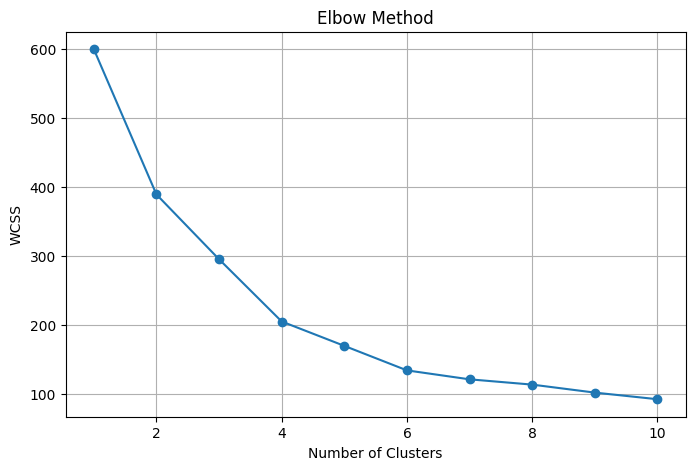

In [15]:
# Elbow mwthod to determine the Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [16]:
# Alternative calculation using Silhouette Score
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, preds)
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=2: 0.3355
Silhouette Score for k=3: 0.3579
Silhouette Score for k=4: 0.4040
Silhouette Score for k=5: 0.4085
Silhouette Score for k=6: 0.4311


In [22]:
# Perform kMeans Clustering with optimal k (from the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
# Display the first few rows with cluster labels
print("\nFirst 5 rows with the cluster labels : ")
print(df.head())


First 5 rows with the cluster labels : 
   customer_id  gender  age  annual_income  spending_score  Cluster      PCA1  \
0            1    Male   19             15              39        2 -0.615720   
1            2    Male   21             15              81        2 -1.665793   
2            3  Female   20             16               6        2  0.337862   
3            4  Female   23             16              77        2 -1.456573   
4            5  Female   31             17              40        2 -0.038465   

       PCA2  
0 -1.763481  
1 -1.820747  
2 -1.674799  
3 -1.772430  
4 -1.662740  


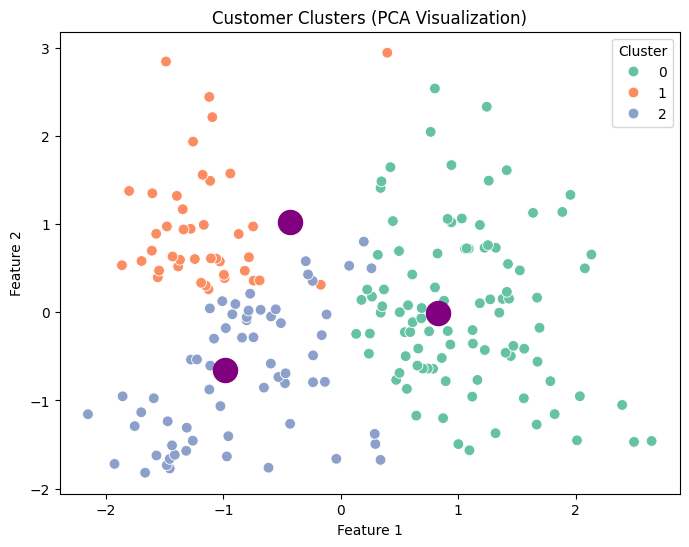

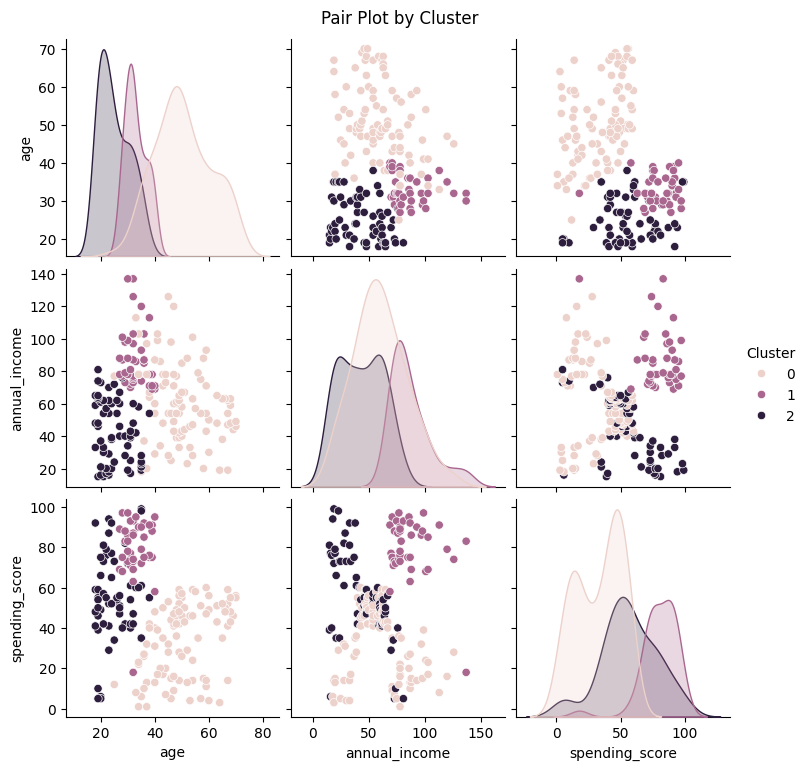

In [32]:
# Visualizations
# Plot clusters in different colors using scatterplot
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='purple',label='Centroids')
plt.title("Customer Clusters (PCA Visualization)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Pair Plot by Cluster
sns.pairplot(df, hue='Cluster', vars=['age', 'annual_income', 'spending_score'])
plt.suptitle("Pair Plot by Cluster", y=1.02)
plt.show()